In [1]:
import time
import numpy as np
import pandas as pd

import galsim #install with conda install -c conda_forge galsim

import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.colors as norm
from matplotlib.gridspec import SubplotSpec
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline #This allows one to build different steps together
from sklearn.preprocessing import StandardScaler, RobustScaler

from tqdm import tqdm 

import target_predicting_RF_function_and_feature_ranking_TNGSIM as functions
import RF_target_predicting_and_learning_curves_functions_TNGSIM as tp_lc_functions

In [2]:
df_0D = pd.read_csv('TNG-SIM_images/v1_initial_analysis/v1_TNG-SIM_0D_Dataset.csv')
df_raw = pd.read_csv('TNG-SIM_images/v1_initial_analysis/v1_TNG-SIM_Raw_Dataset.csv')
print("df_0D.shape", df_0D.shape)
print("df_raw.shape", df_raw.shape)

df_0D.shape (12952, 15)
df_raw.shape (12952, 18)


In [3]:
X_all = df_0D.drop(columns=['SubhaloRstar_0D'])
 

y_all = df_0D.loc[:,'SubhaloRstar_0D']

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Users/festabu/miniforge3/envs/native/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best params, best score: 0.7792 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 500}
RF Accuracy: 0.78 (+/- 0.01)


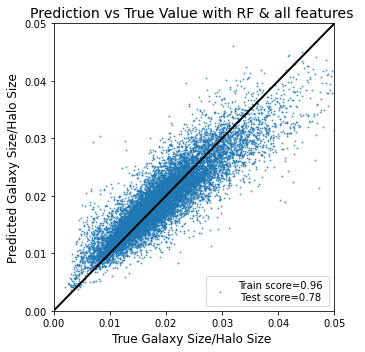

Elapsed time to compute the importances: 0.186 seconds
Elapsed time to compute the importances: 26.045 seconds


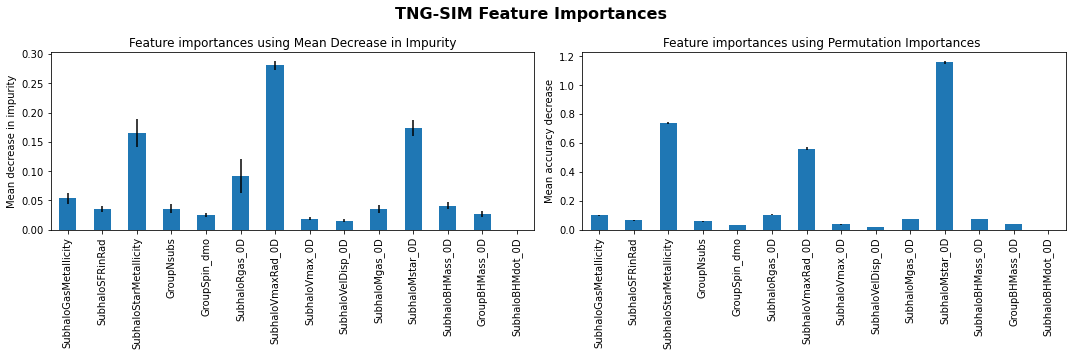

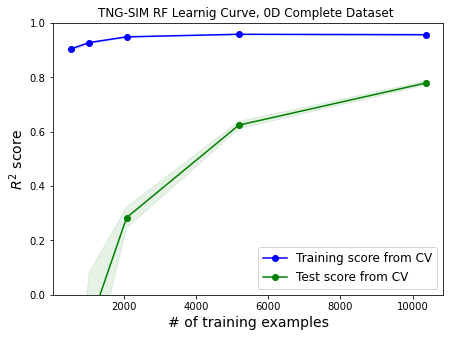

Elapsed time to run RF func and Learning Curves on TNG-SIM 0D Complete Dataset: 651.743 seconds


In [4]:
# this code takes ~16min to run when the dataset is Group 2 galaxies
# with a subset of ~30,000 entries (out of ~64,000 total)
start_time = time.time()

RF_lc_2 = tp_lc_functions.target_predicting_RF_function(X_all, y_all, r'TNG-SIM RF Learnig Curve, 0D Complete Dataset ')

elapsed_time = time.time() - start_time

print(f"Elapsed time to run RF func and Learning Curves on TNG-SIM 0D Complete Dataset: {elapsed_time:.3f} seconds")

In [5]:
lc_2 = RF_lc_2[4]
# lc_2.savefig('TNG-SIM_images/v2_RF_FeatRank/v2_TNG-SIM_0D_AllDataset_2_RF_Learning_Curve_zoom.jpeg', dpi=500)